# Clustering
## K-means算法应用

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. 生成模拟数据
def generate_data(n_samples=500, centers=4, random_state=42):
    """生成模拟聚类数据"""
    X, y_true = make_blobs(n_samples=n_samples, 
                           centers=centers,
                           cluster_std=0.60,
                           random_state=random_state)
    
    # 对数据进行缩放处理
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y_true

In [3]:
# 2. 使用K-means进行聚类
def perform_kmeans(X, n_clusters=4, random_state=42):
    """执行K-means聚类"""
    # 创建KMeans对象
    kmeans = KMeans(n_clusters=n_clusters, 
                    init='k-means++',  # 使用k-means++初始化中心点
                    max_iter=300,      # 最大迭代次数
                    n_init=10,         # 用不同初始化运行算法的次数
                    random_state=random_state)
    
    # 训练模型
    kmeans.fit(X)
    
    # 获取聚类标签和中心点
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return labels, centers, kmeans

In [4]:
# 3. 用肘部法则找最佳K值
def plot_elbow_method(X, max_k=10):
    """使用肘部法则找到最佳的聚类数量"""
    inertia = []
    K_range = range(1, max_k + 1)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('聚类数量 (k)')
    plt.ylabel('SSE (惯性)')
    plt.title('K-means聚类的肘部法则')
    plt.grid(True)
    plt.show()

In [5]:
# 4. 可视化聚类结果
def visualize_clusters(X, labels, centers):
    """可视化聚类结果"""
    plt.figure(figsize=(10, 8))
    
    # 获取唯一的标签
    unique_labels = np.unique(labels)
    
    # 为每个聚类设置不同的颜色
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    # 绘制数据点
    for i, label in enumerate(unique_labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1], 
                    c=[colors[i]], label=f'Cluster {label}', alpha=0.7)
    
    # 绘制中心点
    plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='X', label='Centroids')
    
    plt.title('K-means聚类结果')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24815 (\N{CJK UNIFIED IDEOGRAPH-60EF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaV

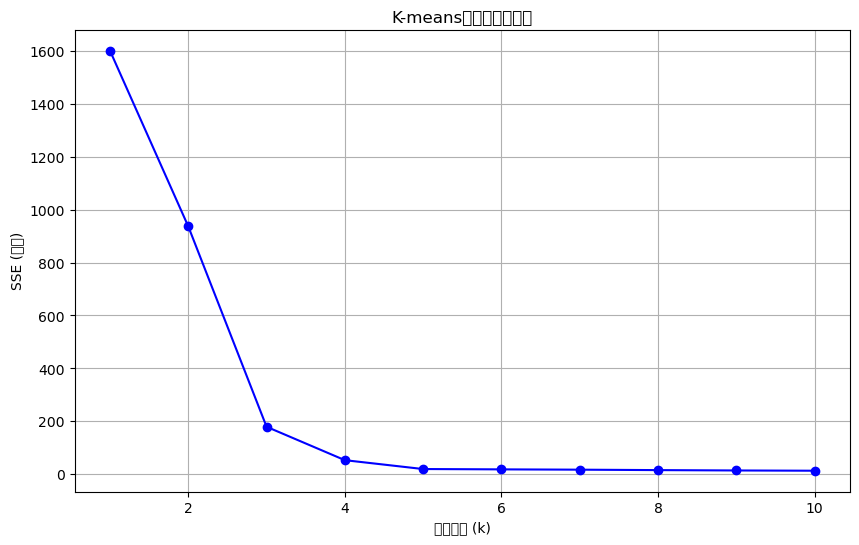

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


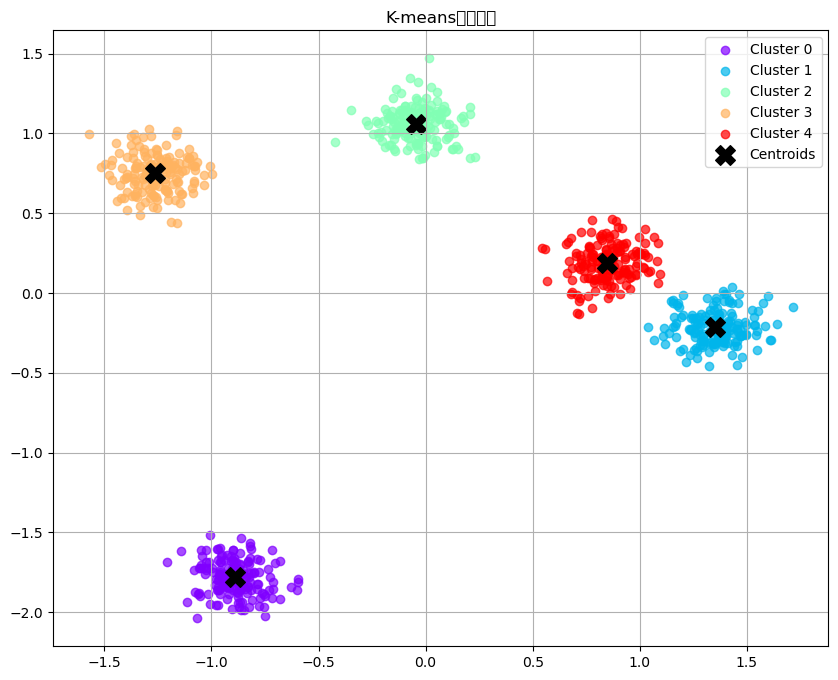

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


轮廓系数平均值: 0.795
调整兰德指数: 1.000


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from font(s) DejaV

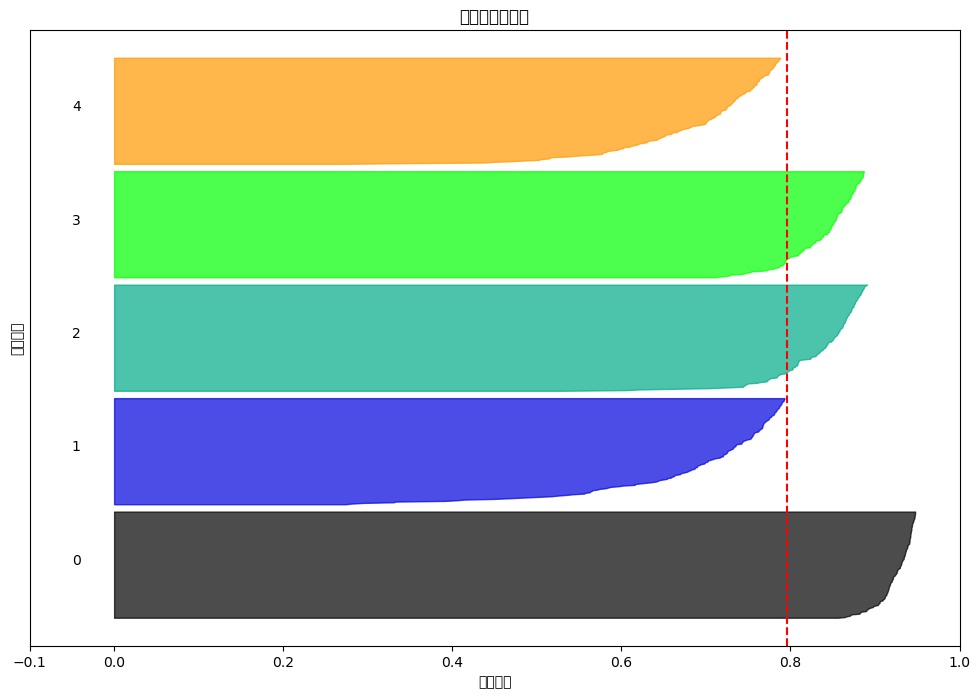


聚类数量: 5
迭代次数: 2
惯性: 19.827
簇 0 的样本数: 160
簇 1 的样本数: 160
簇 2 的样本数: 160
簇 3 的样本数: 160
簇 4 的样本数: 160


In [6]:
# 5. 评估聚类结果
def evaluate_clustering(X, kmeans, true_labels=None):
    """评估聚类结果"""
    # 计算轮廓系数
    from sklearn.metrics import silhouette_score, silhouette_samples
    
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"轮廓系数平均值: {silhouette_avg:.3f}")
    
    # 如果有真实标签，计算调整兰德指数
    if true_labels is not None:
        from sklearn.metrics import adjusted_rand_score
        ari = adjusted_rand_score(true_labels, kmeans.labels_)
        print(f"调整兰德指数: {ari:.3f}")
    
    # 可视化轮廓系数
    plt.figure(figsize=(12, 8))
    
    # 计算每个样本的轮廓系数
    sample_silhouette_values = silhouette_samples(X, kmeans.labels_)
    
    y_lower = 10
    n_clusters = len(np.unique(kmeans.labels_))
    
    for i in range(n_clusters):
        # 聚类i的轮廓系数值
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # 标注聚类编号
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # 计算下一个聚类的y_lower
        y_lower = y_upper + 10
    
    plt.title("聚类的轮廓分析")
    plt.xlabel("轮廓系数")
    plt.ylabel("聚类标签")
    
    # 在图中添加垂直线表示平均轮廓系数
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])  # 清除y轴刻度
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

# 主函数
def main():
    # 生成数据
    X, true_labels = generate_data(n_samples=800, centers=5)
    
    # 使用肘部法则找最佳K值
    plot_elbow_method(X, max_k=10)
    
    # 根据肘部法则结果选择合适的聚类数
    n_clusters = 5  # 可以根据肘部法则结果调整
    
    # 执行K-means聚类
    labels, centers, kmeans_model = perform_kmeans(X, n_clusters=n_clusters)
    
    # 可视化聚类结果
    visualize_clusters(X, labels, centers)
    
    # 评估聚类结果
    evaluate_clustering(X, kmeans_model, true_labels)
    
    # 输出一些基本信息
    print(f"\n聚类数量: {n_clusters}")
    print(f"迭代次数: {kmeans_model.n_iter_}")
    print(f"惯性: {kmeans_model.inertia_:.3f}")
    
    # 统计每个簇的样本数
    for i in range(n_clusters):
        print(f"簇 {i} 的样本数: {np.sum(labels == i)}")

if __name__ == "__main__":
    main()